In [2]:
import numpy
import matplotlib.pyplot as plt

def sigmoid(x):
    return 1/( 1+numpy.exp(-x) )

def linear(x):
    return numpy.heaviside( x, 0 )

class Perceptron:
    """Defines a perceptron with a set of weights with a sigmoid activation function"""
    def __init__(self,inputs, activationFunction, w = None):
        if w is None:
            self.w = numpy.random.rand(inputs) #Initializes the weights to random values between zero and one
        else:
            self.w = w
        self.activation = activationFunction
    
    def update(self,mInput,mOutput):
        trainingOutput = self.activation( numpy.dot(mInput,self.w) ) #Calculate the training output
        self.error = (1/2)*numpy.power( (trainingOutput-mOutput), 2) #Calculate the deviation from the expected value
        self.w -= (trainingOutput-mOutput)*trainingOutput*(1-trainingOutput)*mInput#Updates the weights
        return self.error
    
    def activate(self, data):
        return self.activation( numpy.dot(data,self.w) )
    
    def classify(self, data, threshold):
        classifiedData = data.copy()
        for element in classifiedData:
            if self.activate(element['input']) > threshold:
                element.update({'class' : 1}) #"Fires" the perceptron
            elif self.activate(element['input']) < threshold:
                element.update({'class' : 0}) #Do not fire the perceptron
            else:
                element.update({'class' : -1}) #Not capable of deciding
        return classifiedData

In [3]:
#Loads data
data = []

import csv

with open('pseudo_data_square.csv', newline='') as file:
    stream = csv.reader(file, delimiter = '\t')
    for row in stream:
        data.append({'input':numpy.array([float(row[0])+numpy.random.rand()-0.5,float(row[1])+numpy.random.rand()-0.5,1]),'output':float(row[2])}) #Adiciona um desvio aleatório nas coords x,y de cada dado para tornar o resultado não-linear

In [8]:
#Inicializa o Perceptron
m = Perceptron(3,sigmoid) #Inicializa um perceptron de 3 parametros com função de ativação sigmoide

rounds = 200#100 rounds de treinamento

errors = numpy.empty(rounds) #Histórico de erros em cada treino

for currentRound in numpy.arange(rounds): #Treina o perceptron
    for element in data[:rounds]:
        errors[currentRound] = m.update( element['input'], element['output'])

In [9]:
#Prepara os resultados para serem apresentados

#Separa os dados carregados em dois grupos, um deles contendo os pontos para os quais o resultado é 1 e outro contendo os pontos
#para os quais o resultado é 0
positiveData = numpy.transpose( [i['input'] for i in data if i['output']==1 ] )
negativeData = numpy.transpose( [i['input'] for i in data if i['output']==0 ] )

#Prepara um histograma com o output do perceptron para cada dado de treinamento
histogramData = [m.activate(k['input']) for k in data]

#Prepara os pontos da reta resultante do treinamento do perceptron
x = numpy.array([-.1,1.1])

#Classifica pontos novos, gerados aleatoriamente e prepara os dados para apresentação
threshold = 0.5
testData = [ {'input':numpy.random.rand(3)} for i in numpy.arange(1000) ]
testData = m.classify(testData, threshold) #Classifica todos os elementos de allData de acordo com o treinamento do perceptron

positiveTestData = numpy.transpose( [i['input'] for i in testData if i['class']==1 ] )
negativeTestData = numpy.transpose( [i['input'] for i in testData if i['class']==0 ] )
unknownTestData = numpy.transpose( [i['input'] for i in testData if i['class']==-1 ] )

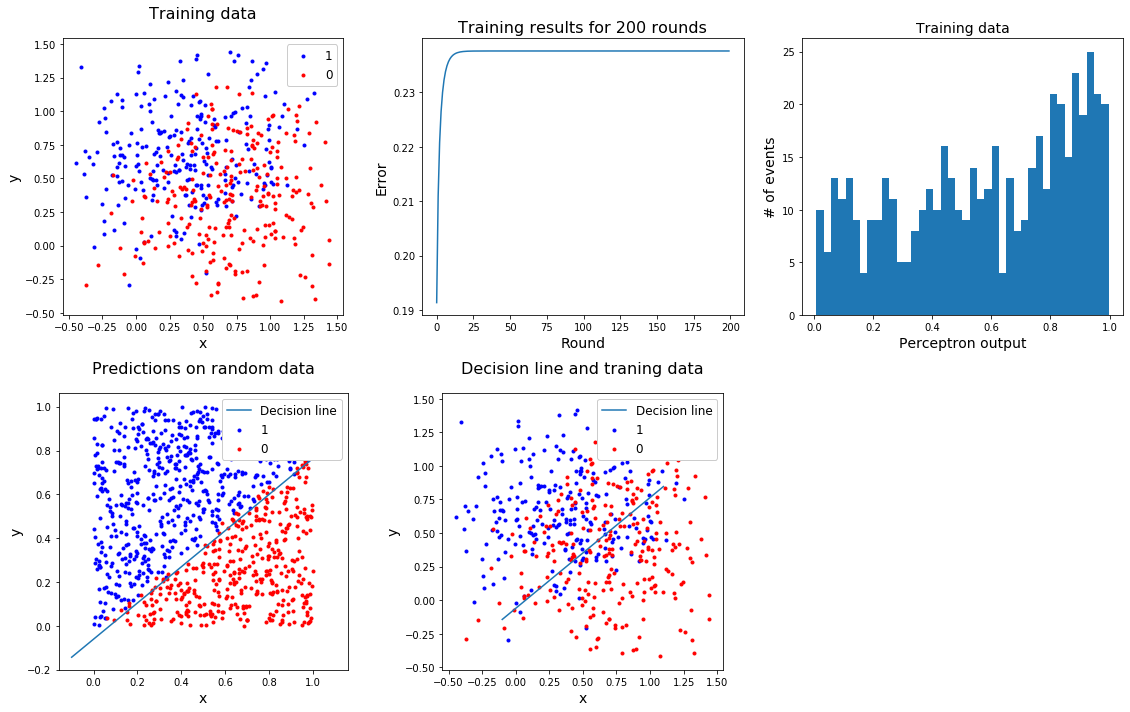

In [10]:
#Prepara os plots
fig = plt.figure(figsize = (16,10)) #Inicializa um figura de 16x10 cm?

#Inicializa os eixos. São 5 gráficos, então são 5 eixos
ax = [None,None,None,None,None]
ax[0] = fig.add_subplot(231)
ax[1] = fig.add_subplot(232)
ax[2] = fig.add_subplot(233)
ax[3] = fig.add_subplot(234)
ax[4] = fig.add_subplot(235)

#Prepara título, legends, aspect ratios e labels de cada plot
ax[0].set_title('Training data', fontsize = 16, pad = 20)
ax[0].set_xlabel('x', size = 14)
ax[0].set_ylabel('y', size = 14)
ax[0].set_aspect('equal')

ax[1].set_title("Training results for %s rounds" % rounds, size = "16")
ax[1].set_ylabel("Error", size = 14)
ax[1].set_xlabel("Round", size = 14)

ax[2].set_xlabel("Perceptron output", size = 14)
ax[2].set_ylabel("# of events", size = 14)
ax[2].set_title("Training data", size = 14)

ax[3].set_title('Predictions on random data', fontsize = 16, pad = 20)
ax[3].set_aspect('equal')
ax[3].set_xlabel('x', size = 14)
ax[3].set_ylabel('y', size = 14)

ax[4].set_title('Decision line and traning data', fontsize = 16, pad = 20)
ax[4].set_aspect('equal')
ax[4].set_xlabel('x', size = 14)
ax[4].set_ylabel('y', size = 14)

#Aloca os dados em cada plot
if len(positiveData) != 0:
    ax[0].scatter(positiveData[0] , positiveData[1],  color='blue', label = '1', marker ='.')
    ax[4].scatter(positiveData[0] , positiveData[1],  color='blue', label = '1', marker ='.')
if len(negativeData) != 0:
    ax[0].scatter(negativeData[0] , negativeData[1] ,  color='red', label = '0', marker ='.')
    ax[4].scatter(negativeData[0] , negativeData[1] ,  color='red', label = '0', marker ='.')
    
ax[1].plot(numpy.arange(rounds), errors)

ax[2].hist(histogramData, bins=40)

if len(positiveTestData) != 0:
    ax[3].scatter(positiveTestData[0] , positiveTestData[1],  color='blue', label = '1', marker ='.') #Plot the points
if len(negativeTestData) != 0:
    ax[3].scatter(negativeTestData[0] , negativeTestData[1] ,  color='red', label = '0', marker ='.') #Plot the points
if len(unknownTestData) != 0:
    ax[3].scatter(unknownTestData[0] , unknownTestData[1] ,  color='yellow', label = '?', marker ='.') #Plot the points

ax[3].plot( x, -m.w[2]/m.w[1]-x*m.w[0]/m.w[1], label = 'Decision line')
ax[4].plot( x, -m.w[2]/m.w[1]-x*m.w[0]/m.w[1], label = 'Decision line')
    
#Adiciona as legends aos plots
ax[0].legend(loc = 'upper right', framealpha = 1, fontsize=12)

ax[3].legend(loc = 'upper right', framealpha = 1, fontsize=12)

ax[4].legend(loc = 'upper right', framealpha = 1, fontsize=12)

#Apresenta os plots
plt.tight_layout()
plt.show()

In [11]:
print("Linha de decisão: y = %.4f * x + %.4f" % ( -m.w[0]/m.w[1],-m.w[2]/m.w[1]))

u = m.classify(data,0.5)
mistakes = 0
for k in range(len(data)):
    if u[k]['class'] != data[k]['output']:
        mistakes += 1
print("%s erros quando comparado com os dados de treinamento" % mistakes)

Linha de decisão: y = 0.8245 * x + -0.0608
147 erros quando comparado com os dados de treinamento
